# Classifying movie reviews:
a binary classification example

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data , train_labels) , (test_data , test_labels) = imdb.load_data(num_words = 10000)
#num_words islu q k hmnu sbsy ziada repeat huny waly words ko lya hai means k jo ziada rare hun unko lya hai
#train data and test data are lsit or reviews
# train labels and test labels are list of 0 and 1 where 0 is -ve and 1 s +ve

# Encoding the integer sequences into a binary matrix

In [3]:
import numpy as np
def f(a):
    d =10000
    results = np.zeros((len(a),d))
    for a in enumerate(a):
        results[a] = 1
    return results

In [4]:
x_train = f(train_data)
x_test = f(test_data)

In [5]:
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

In [6]:
# ye krny ki waja ye hai q k har label ko binary encoding m convert krna tha second q k hm neural netwrok me ik tarah la
#output deskty hain means ik lenght ka to hmny  data ko 10000 ki dimension me convert krlya means 
#labels me pehly yaha kcuh values  thy lekn ub 10000 hain or hmny loop esa lgaya hai k jaha usko value mlegi wahe wo 1 put
#krega otherwise sbko zero rehne dega

# Building your network

In [7]:
#data is vectors and labels are scalors

# model definition

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [9]:
model = models.Sequential()
model.add(layers.Dense(16 ,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Compiling the model

In [10]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrices = 'acc')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
#ub hmny apny data ko verify krengy k k kahe ye testing k waqt fail na hujaye

# setting up validiatation

In [12]:
len(x_train)

25000

In [13]:
x_validation = x_train[:10000]
partial_xtrain = x_train[10000:]
y_validation = y_train[:10000]
partial_ytrain = y_train[10000:]

In [14]:
#ub hm partial valy data ko validation waly p run krengy yani hm yahe isko validitate krry hain ta k hmen pta lge
# k ye kitna prepare hai or unseen data ko face krskta hai b ya nahi???

# training your model

In [15]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
umair = model.fit(partial_xtrain,
                 partial_ytrain,
                 epochs = 20,
                 batch_size = 512,
                 validation_data = (x_validation,y_validation))
#batch size ka mtlb sir n kaha tha k ispy research kr k btauga
# partial data ka mtlb jisko hmen test krna hau
#epochs mtlb loop
#partial xtrain and validate  hamaray model hai

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 81s 5ms/sample - loss: 0.5140 - acc: 0.7798 - val_loss: 0.3810 - val_acc: 0.8721
Epoch 2/20
15000/15000 [==============================] - 8s 550us/sample - loss: 0.2982 - acc: 0.9058 - val_loss: 0.2983 - val_acc: 0.8877
Epoch 3/20
15000/15000 [==============================] - 5s 362us/sample - loss: 0.2187 - acc: 0.9243 - val_loss: 0.2757 - val_acc: 0.8921
Epoch 4/20
15000/15000 [==============================] - 6s 367us/sample - loss: 0.1726 - acc: 0.9424 - val_loss: 0.2755 - val_acc: 0.8893
Epoch 5/20
15000/15000 [==============================] - 6s 408us/sample - loss: 0.1373 - acc: 0.9558 - val_loss: 0.3441 - val_acc: 0.8687
Epoch 6/20
15000/15000 [==============================] - 6s 403us/sample - loss: 0.1138 - acc: 0.9649 - val_loss: 0.2988 - val_acc: 0.8851
Epoch 7/20
15000/15000 [==============================] - 6s 425us/sample - loss: 0.0951 - acc: 0.9719 - val_lo

In [16]:
umair_dict = umair.history
umair_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [17]:
#means our dictionary has four entries, # baqi kaam kal krna hai

# Plotting the training and validation loss

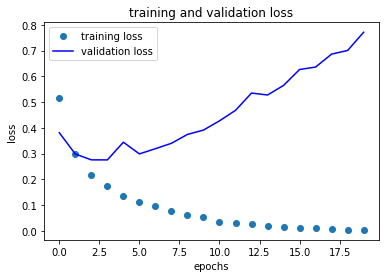

In [21]:
epochs = range(1,len(umair_dict['acc'])+1)
import matplotlib.pyplot as plt
plt.plot(umair_dict['loss'],'o',label="training loss")
plt.plot(umair_dict['val_loss'],'b',label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("training and validation loss")
plt.show()


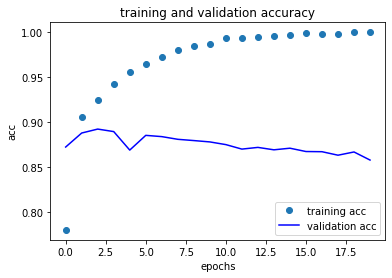

In [22]:
plt.plot(umair_dict['acc'],'o',label="training acc")
plt.plot(umair_dict['val_acc'],'b',label="validation acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.title("training and validation accuracy")
plt.show()

# now test our model on unseen data

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [24]:
model.fit(x_train,y_train,epochs = 4,batch_size = 512)
results = model.evaluate(x_test,y_test)
results

Epoch 1/4
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.4591 - acc: 0.8252
Epoch 2/4
25000/25000 [==============================] - 10s 410us/sample - loss: 0.2641 - acc: 0.9071
Epoch 3/4
25000/25000 [==============================] - 9s 344us/sample - loss: 0.2029 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 107s 4ms/sample - loss: 0.2875 - acc: 0.8869


[0.2874804517745972, 0.88688]

# Further experiments

try using one or three hidden layers

try using more or fever hidden units

try using meansquared erroe instead of binary_crossentropy

try using tanh instead of relu activitation